In [56]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [53]:
from utils.func_utils import accept, jacobian, autocovariance, get_log_likelihood, get_data, binarize, normal_kl
from utils.distributions import Gaussian, GMM, GaussianFunnel, gen_ring, RoughWellhWell
from utils.layers import Linear, Parallel, Sequential, Zip, ScaleTanh
from utils.dynamics import Dynamics
from utils.sampler import propose
from utils.losses import get_loss, loss_mixed

In [65]:
sess = tf.Session()

gaussian = RoughWell(dim=2, eps=0.01)
x_dim = 2

def get_hmc_samples(eps, steps=200, samples=None):
    hmc_dynamics = Dynamics(x_dim, gaussian.get_energy_function(), T=5, eps=eps, hmc=True)
    hmc_x = tf.placeholder(tf.float32, shape=(None, x_dim))
    Lx, _, px, hmc_MH = propose(hmc_x, hmc_dynamics, do_mh_step=True)
    
    if samples is None:
        samples = gaussian.get_samples(n=200)
    final_samples = []
    
    for t in range(steps):
        final_samples.append(np.copy(samples))
        Lx_, px_, samples = sess.run([Lx, px, hmc_MH[0]], {hmc_x: samples})
        if np.isnan(Lx_.flatten()).sum() > 0:
            print np.round(px_, decimals=2)
    return np.array(final_samples)

In [76]:
samples = np.random.randn(200, 2)
S = get_hmc_samples(0.05, samples=samples)
T = get_hmc_samples(0.15, samples=samples)
U = get_hmc_samples(0.25, samples=samples)
V = get_hmc_samples(0.35, samples=samples)

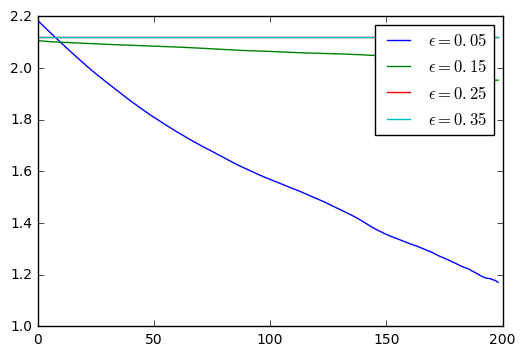

In [77]:
plt.plot(np.abs([autocovariance(S, tau=t) for t in range(199)]), label='$\epsilon=%.2f$' % 0.05)
plt.plot(np.abs([autocovariance(T, tau=t) for t in range(199)]), label='$\epsilon=%.2f$' % 0.15)
plt.plot(np.abs([autocovariance(U, tau=t) for t in range(199)]), label='$\epsilon=%.2f$' % 0.25)
plt.plot(np.abs([autocovariance(V, tau=t) for t in range(199)]), label='$\epsilon=%.2f$' % 0.35)

plt.legend()

In [70]:
for eps in np.arange(0.05, 0.5, 0.1):
    print eps
    plt.plot(np.abs([autocovariance(get_hmc_samples(eps), tau=t) for t in range(199)]), label='$\epsilon=%.2f$' % eps)
plt.legend()

0.05


KeyboardInterrupt: 

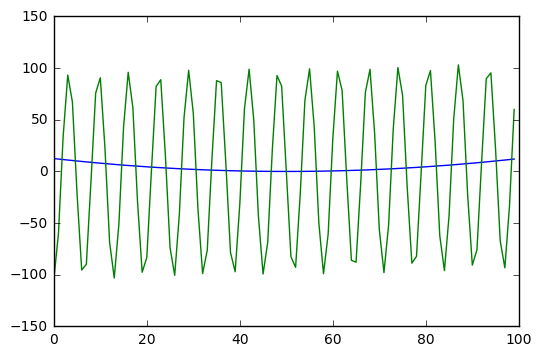

In [52]:
plt.plot(e_)
plt.plot(g_)

In [78]:
eps = tf.Variable(0.1)

In [81]:
tf.get_variable('Variable:0')

ValueError: Shape of a new variable (Variable:0) must be fully defined, but instead was <unknown>.

In [87]:
test_CS = [-86.647043457, -84.437677002, -84.5796582031, -84.182923584]
test_HMC = [-88.40, -85.81, -85.19, -84.84]
lf = [1, 2, 5, 10]

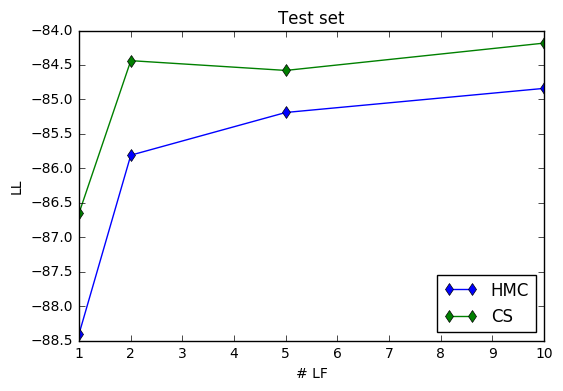

In [91]:
plt.plot(lf, test_HMC, marker='d', label='HMC')
plt.plot(lf, test_CS, marker='d', label='CS')
plt.xlabel('# LF')
plt.ylabel('LL')
plt.title('Test set')
plt.legend(loc=4)

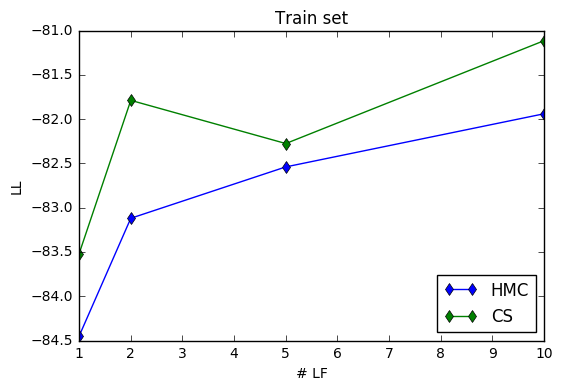

In [94]:
train_CS = [-83.5194287109, -81.7886328125, -82.2762280273, -81.1147143555]
train_HMC = [-84.45, -83.12, -82.54, -81.94]

plt.plot(lf, train_HMC, marker='d', label='HMC')
plt.plot(lf, train_CS, marker='d', label='CS')
plt.xlabel('# LF')
plt.ylabel('LL')
plt.title('Train set')
plt.legend(loc=4)

In [95]:
opt = tf.train.AdamOptimizer(0.01)

In [108]:
v = tf.placeholder(tf.float32, shape=(4,))

A1 = tf.tile(tf.expand_dims(v, 1), (1, 4))

In [109]:
res = A1 - tf.transpose(A1)

In [110]:
M = sess.run(res, {v: [1, 2, 3, 4]})

In [111]:
M.shape

(4, 4)

In [112]:
A1

<tf.Tensor 'Tile_4:0' shape=(4, 4) dtype=float32>

In [113]:
M

array([[ 0., -1., -2., -3.],
       [ 1.,  0., -1., -2.],
       [ 2.,  1.,  0., -1.],
       [ 3.,  2.,  1.,  0.]], dtype=float32)

In [114]:
0.4460 ** 2

0.198916